# Statistics

In [56]:
from datasets import load_dataset, load_from_disk

#dataset = load_dataset("oaipmh", name="ubffm_ft_10")
dataset = load_from_disk("../data/datasets/ubffm_ft_debug_dataset/")

from run_ft_with_dataset import DS_NAMES

In [57]:
import pandas as pd
from oaipmh.helpers import _flatten

dataset["train"]
df = pd.DataFrame(dataset["train"])
pd.DataFrame( _flatten(df["all_ner_tags"]), columns=["all_ner_tags"] ).value_counts()

all_ner_tags
0               11361634
3                 141366
4                  14078
1                    239
2                    194
dtype: int64

In [58]:
pd.DataFrame( _flatten(df["all_ner_tags"]), columns=["all_ner_links"] ).value_counts()

all_ner_links
0                11361634
3                  141366
4                   14078
1                     239
2                     194
dtype: int64

In [59]:
train_ds = dataset["train"]

In [60]:
df = train_ds.to_pandas()
df

,id_,id,identifiers,relations,all_tokens,all_ner_tags,all_ner_links,title_tokens,title_ner_tags,title_ner_links,subject_tokens,subject_ner_tags,subject_ner_links,description_tokens,description_ner_tags,description_ner_links,text_tokens,text_ner_tags,text_ner_links,pdf_links
0,30944,oai:publikationen.ub.uni-frankfurt.de:30944,[http://publikationen.ub.uni-frankfurt.de/fron...,[],"[Die, motorische, Funktionsprüfung, bei, orale...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Die, motorische, Funktionsprüfung, bei, orale...","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[Artikulationsstörung, Patholinguistik, Artiku...","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[Cancer, in, the, oral, cavity, is, one, of, t...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Mariam, Hartinger, and, Christine, Mooshammer...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[http://publikationen.ub.uni-frankfurt.de/file...
1,25981,oai:publikationen.ub.uni-frankfurt.de:25981,[http://publikationen.ub.uni-frankfurt.de/fron...,[],"[Sprichwörter, im, Text, -, ein, Stein, im, Sc...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Sprichwörter, im, Text, -, ein, Stein, im, Sc...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Sprichwort, Textlinguistik, Jelinek,, Elfried...","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[Taking, the, notion, of, frame, as, a, base, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Eva, M.F:, Glenk*, Abstract:, Taking, the, no...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[http://publikationen.ub.uni-frankfurt.de/file...
2,25986,oai:publikationen.ub.uni-frankfurt.de:25986,[http://publikationen.ub.uni-frankfurt.de/fron...,[],"[Das, Problem, der, Stereotype, und, Vorurteil...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Das, Problem, der, Stereotype, und, Vorurteil...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[Stereotyp, Kognitive, Psychologie, Sozialpsyc...","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[This, paper, tries, to, give, a, definition, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[DAS, PROBLEM, DER, STEREOTYPE, UND, VORURTEIL...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[http://publikationen.ub.uni-frankfurt.de/file...
3,26002,oai:publikationen.ub.uni-frankfurt.de:26002,[http://publikationen.ub.uni-frankfurt.de/fron...,[],"[Die, Frau, im, Spiegel, deutscher, Sprichwört...","[0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, ...","[0, 368, 0, 0, 0, 0, 0, 0, 3988, 368, 0, 0, 0,...","[Die, Frau, im, Spiegel, deutscher, Sprichwörter]","[0, 3, 0, 0, 0, 0]","[0, 368, 0, 0, 0, 0]","[Sprichwort, Sprichwortforschung, Deutsch, Fra...","[0, 0, 3, 3, 0, 0, 0, 0]","[0, 0, 3988, 368, 0, 0, 0, 0]","[This, paper, aims, to, demonstrate, the, prov...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[Eva, Maria, Ferreira, Glenk**, Abstract:, Thi...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[http://publikationen.ub.uni-frankfurt.de/file...
4,26005,oai:publikationen.ub.uni-frankfurt.de:26005,[http://publikationen.ub.uni-frankfurt.de/fron...,[],"[Sepp,, Heinz, und, Konrad, oder:, Die, Geburt...","[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, ...","[0, 0, 0, 0, 0, 0, 1563, 0, 0, 0, 0, 0, 0, 0, ...","[Sepp,, Heinz, und, Konrad, oder:, Die, Geburt...","[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1563, 0, 0, 0, 0, 0, 0, 0]","[

In [61]:
all_tags = df["all_ner_tags"].apply(pd.Series)

all_tags.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,221299,221300,221301,221302,221303,221304,221305,221306,221307,221308,221309,221310,221311,221312,221313,221314,221315,221316,221317,221318,221319,221320,221321,221322,221323,221324,221325,221326,221327,221328,221329,221330,221331,221332,221333,221334,221335,221336,221337,221338
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#all_tags.value_counts().head()

In [63]:
all_links = df["all_ner_links"].apply(pd.Series)
all_links.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,221299,221300,221301,221302,221303,221304,221305,221306,221307,221308,221309,221310,221311,221312,221313,221314,221315,221316,221317,221318,221319,221320,221321,221322,221323,221324,221325,221326,221327,221328,221329,221330,221331,221332,221333,221334,221335,221336,221337,221338
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,368.0,0.0,0.0,0.0,0.0,0.0,0.0,3988.0,368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,1563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3988.0,0.0,0.0,3419.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3988.0,0.0,0.0,0.0,3988.0,0.0,0.0,0.0,0.0,3988.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#all_links.value_counts()


In [70]:
pd.DataFrame(_flatten(train_ds["all_ner_links"]), columns=["all_ner_links"]).value_counts()

all_ner_links
0                11362067
3895                 7082
3988                 6121
1803                 5557
2417                 4060
                   ...   
1454                    1
1447                    1
3625                    1
3632                    1
2928                    1
Length: 1185, dtype: int64

In [66]:
pd.DataFrame(_flatten(train_ds["all_ner_tags"]), columns=["all_ner_tags"]).value_counts()

all_ner_tags
0               11361634
3                 141366
4                  14078
1                    239
2                    194
dtype: int64

In [67]:
pd.DataFrame(_flatten(train_ds["all_tokens"]), columns=["all_tokens"]).value_counts().head()

all_tokens
der           272715
die           239394
und           220589
in            164188
von           104471
dtype: int64

In [68]:
train_ds.features["all_ner_links"].feature.int2str(3988)

'http://data.linguistik.de/bll/bll-ontology#bll-133070158'

In [1]:
from datasets import load_from_disk
ds = load_from_disk("ubffm_ft_debug_dataset")

In [2]:
import pandas as pd
import json

with open("../data/SPEEDTEST_oaipmh/ubffm_ft_debug.json", "r") as f:
    lines = [line.strip() for line in f.readlines()]
objs = [json.loads(line) for line in lines if line and not line.strip().startswith("#")]
from_types = {o["from_type"] if "from_type" in o else None for o in objs}
type_dict = {t: [o for o in objs if o["from_type"] == t] for t in from_types}


In [77]:
pdf_data = pd.DataFrame(type_dict["pdf"])

pdf_data["duration"].describe().to_latex("../doc/figures/tbl:pdf_extraction:duration.tex")


/tmp/ipykernel_198377/2042946958.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pdf_data["duration"].describe().to_latex("../doc/figures/tbl:pdf_extraction:duration.tex")


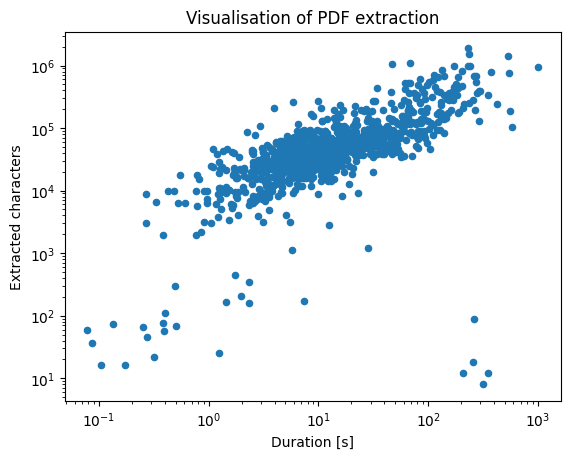

In [78]:

pdf_data.plot(
    x="duration",
    y="to_count",
    kind="scatter",
    loglog=True,
    xlabel="Duration [s]",
    ylabel="Extracted characters",
    title="Visualisation of PDF extraction",
).get_figure().savefig("../doc/figures/statistics:pdf_extractions.pgf", backend="pgf")

from_type
pdf        AxesSubplot(0.125,0.11;0.775x0.77)
records    AxesSubplot(0.125,0.11;0.775x0.77)
xml        AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

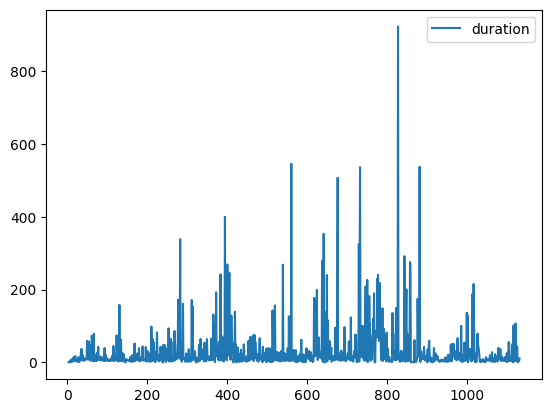

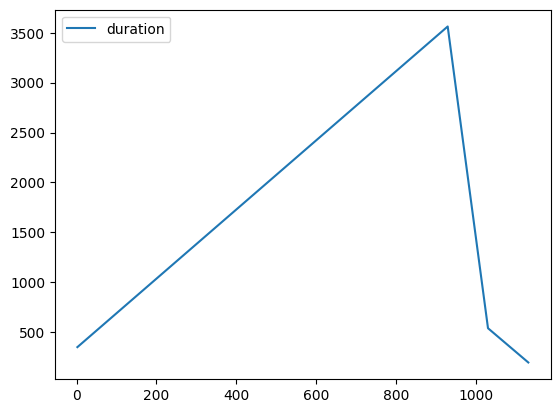

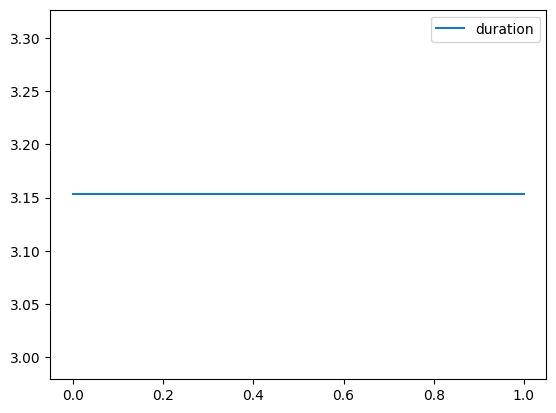

In [38]:
df = pd.DataFrame(
    objs
)
df.groupby("from_type").plot(y="duration")

In [44]:
df[["from", "to","from_type"]] = df[["from", "to","from_type"]].astype("category")
df.dtypes


from_type     category
from          category
to            category
from_count       int64
to_count         int64
duration       float64
dtype: object

to
characters    AxesSubplot(0.125,0.11;0.775x0.77)
lists         AxesSubplot(0.125,0.11;0.775x0.77)
pdfs          AxesSubplot(0.125,0.11;0.775x0.77)
records       AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

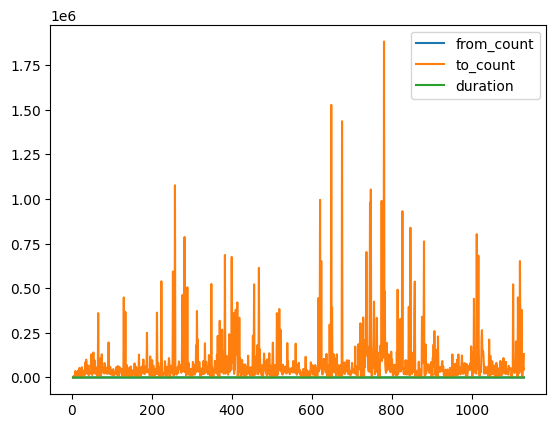

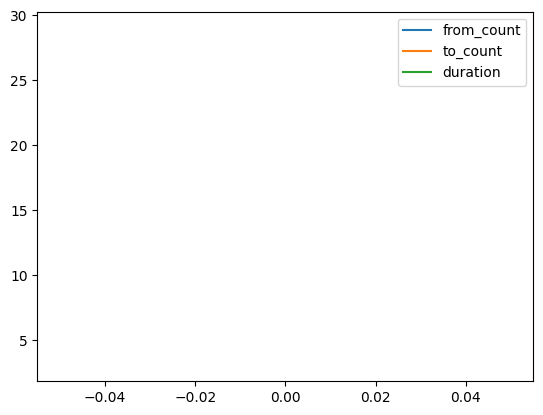

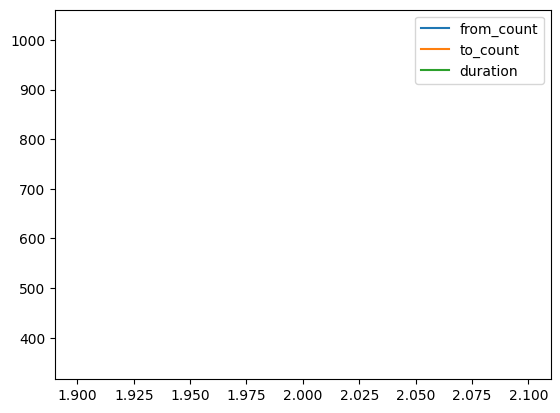

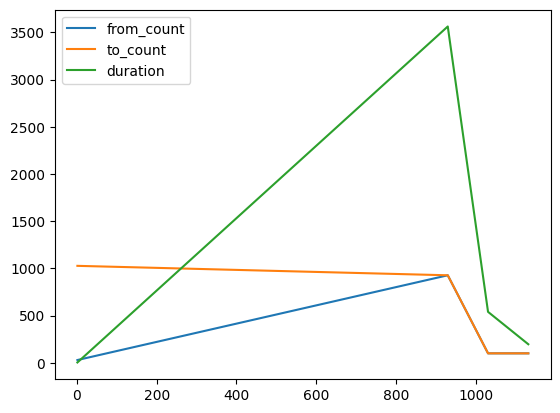

In [47]:
df.groupby("to").plot()

In [50]:
with open("SPEEDTEST_lang-sci-press_ft_debug.json") as f:
    speedtest_obj = json.load(f)
speedtest_obj.keys()


dict_keys(['publisher', 'oaipmh_xml_files', 'extract_fulltexts', 'do_string_match', 'distribution_all_ner_tags', 'tag_list', 'distribution_all_ner_links', 'link_list', 'duration'])

In [52]:
all_ner_links_df = pd.DataFrame(
    speedtest_obj["distribution_all_ner_links"]["label_distribution"]
)
all_ner_tags_df = pd.DataFrame(
    speedtest_obj["distribution_all_ner_tags"]["label_distribution"]
)
all_ner_tags_df["labels"] = [
    speedtest_obj["tag_list"][x] for x in all_ner_tags_df["labels"]
]
all_ner_links_df["labels"] = [
    l.split('#')[1]
    if '#' in (l:=speedtest_obj["link_list"][x])
    else "EMPTY"
    for x in all_ner_links_df["labels"]
]

all_ner_tags_df["labels"] = all_ner_tags_df["labels"].astype("category")
all_ner_links_df["labels"] = all_ner_links_df["labels"].astype("category")


['labels', 'fractions']

In [6]:
all_ner_links_df.plot(kind="bar", y="fractions", x="labels",)


<AxesSubplot:xlabel='labels'>

Error in callback <function flush_figures at 0x7f37f64ab760> (for post_execute):


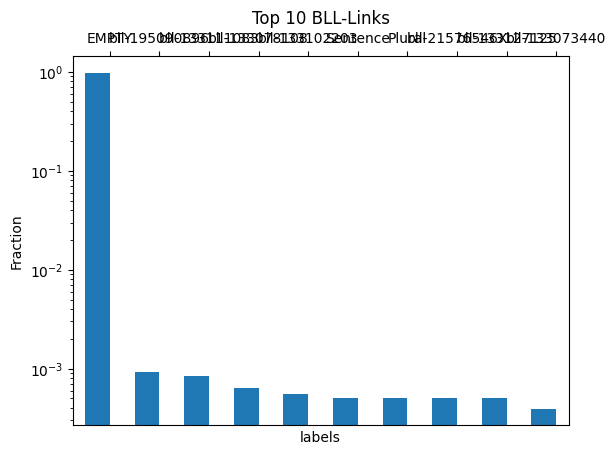

In [62]:
import matplotlib



links_plot = all_ner_links_df.nlargest(10, columns=["fractions"]).dropna().plot(
    kind="bar",
    y="fractions",
    x="labels",
    logy=True,
    title="Top 10 BLL-Links",
    ylabel="Fraction",
    legend=False,
    backend="matplotlib",
    position=1,
    rot=45,
)
links_plot.xaxis.tick_top()

links_plot.get_figure().savefig(
    "../doc/figures/statistics:links.pgf", backend="pgf"
)


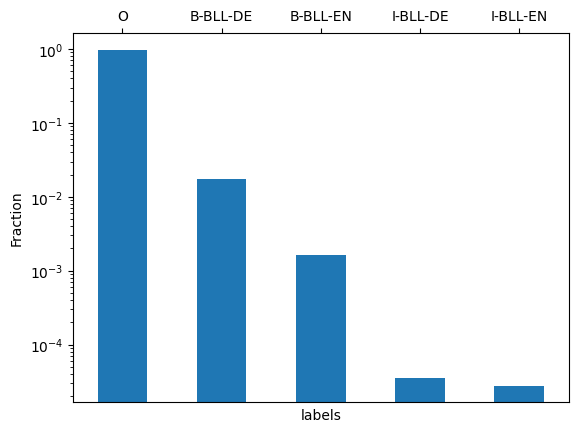

In [63]:
tags_plot = all_ner_tags_df.plot(
    kind="bar",
    y="fractions",
    x="labels",
    logy=True,
    # xlabel="Tags",
    ylabel="Fraction",
    legend=False,
    rot="horizontal",
    backend="matplotlib",
    table=False,
)
tags_plot.xaxis.tick_top()

tags_plot.get_figure().savefig("../doc/figures/statistics:tags.pgf", backend="pgf")


In [ ]:
import matplotlib as mpl
# Use the pgf backend (must be set before pyplot imported)
mpl.use('pgf')

import matplotlib.pyplot as plt
